Exercise 1:<br>
Part (a):

Firstly, I multiplied out Matrix A to get:
A = (1/b)[[b,1],[-1,1]]
A = [[1,1/b],[-1/b,1/b]]
I can now plot this into a numpy matrix as shown below:

In [120]:
import numpy as np
a = 4
b = 3
A = np.matrix([[1,1/b],[-1/b,1/b]])

Now I will import all the parts 1-4 as a list of coordinates as a list of arrays.
I did this in such a way that I could read if the points were connected, by looking at the space next to the coordinate for a given symbol:

c = → = connected

n = then = not connected

When plotting the graphs later I can then use this to determine whether I need to connect the two adjacent points or not.

In [121]:
Part1 = [[a,a],"c",[a,-a],"c",[-a,-a],"c",[-a,a],"c",[a,a]]
Part2 = [[1-a,a-1],"c",[-a/4,a-1],"c",[-a/4,a/2],"c",[1-a,a/2],"c",[1-a,a-1]]
Part3 = [[a/4,a-1],"c",[a-1,a/2],"n",[a-1,a-1],"c",[a/4,a/2]]
Part4 = [[a-1,-a/4],"c",[a-1,-a/2],"c",[1-a,-a/2],"c",[1-a,-a/4]]

Next is the function that performs the transformation of points in Parts 1-4 induced by matrix A
I do this by using the logic that the coordinate vector:

[e,<br>
f ]

transformed by

[a, b,    
c, d]

is equal to

[a × e + b × f,<br>
 c × e + d × f]

The function takes in two variables, coordinate, which is the coordinate point you want to apply the transformation on, and the matrix you wish to apply.
In the function, I create a new coordinates matrix of dimensions 2x1, I set the first collumn first row to a × e + b × f = matrix[0,0] × coordinate[0] + matrix[0,1] × coordinate[1]
and the first collumn second row to c × e + d × f = matrix[1,0] × coordinate[0] + matrix[1,1] × coordinate[1]
I then return the new coordinates matrix

In [122]:
def transformCoordinate(coordinate, matrix):
    newCoordinates = np.zeros((2,1))
    newCoordinates[0] = matrix[0,0]*coordinate[0]+matrix[0,1]*coordinate[1]
    newCoordinates[1] = matrix[1,0]*coordinate[0]+matrix[1,1]*coordinate[1]
    return newCoordinates

Exercise 1:<br>
Part (b):

Using my function, I pass in every coordinate in parts 1-4 and generate the new coordinate list:

In [123]:
def newValues(part):
    x = 0
    newCoordinatesArray = []
    while x < len(part):
        newCoordinatesArray.append([transformCoordinate(part[x],A)[0],transformCoordinate(part[x],A)[1]])
        try:
            newCoordinatesArray.append(part[x+1])
        except:
            pass
        x+=2
    return newCoordinatesArray

#Actually getting the values
newPart1 = newValues(Part1)
newPart2 = newValues(Part2)
newPart3 = newValues(Part3)
newPart4 = newValues(Part4)

I do this by going through every element in the part, appending to a new array the transform of the element then in the next slot append the letter associated with what we do with it, I then increment by 2 so that we ignore the letters after they have been appended to the new array.
I use a try-except to ignore the final appending of part[x+1] as this does not exist.

Next, I will plot the new parts onto a graph:

In [124]:
import matplotlib.pyplot as plt

def plotPart(part, colour):
    x = 0
    while x < len(part):
        if type(part[x][0]) == int or type(part[x][0]) == float:
            try:
                if part[x+1] == "c":
                    plt.plot([part[x][0],part[x+2][0]], [part[x][1],part[x+2][1]], colour, linestyle="-")
                else:
                    plt.plot(part[x][0], part[x][1], colour)
            except:
                pass
        else:
            try:
                if part[x+1] == "c":
                    plt.plot([part[x][0][0],part[x+2][0][0]], [part[x][1][0],part[x+2][1][0]], colour, linestyle="-")
                else:
                    plt.plot(part[x][0][0], part[x][1][0], colour)
            except:
                pass
        x+=2

This is done by looping through every second value of the part given in the function, I then check if the value in the position I wish to plot is an int of float, telling me whether or not this is a new or old part (as new parts are formatted slightly differently (with an extra dimension) so I will need to read that dimension to plot it). Following from this, I determine if the value in the position after the value I am looking at is a 'c' meaning connected, if so I will plot it with the next point and connect the two points with a line, otherwise I will just plot the point. I finally increment x (the position I am looking at) by 2 to skip the value holding either a 'c' or 'n'.

Below is the graph of the diagram before the transformation:

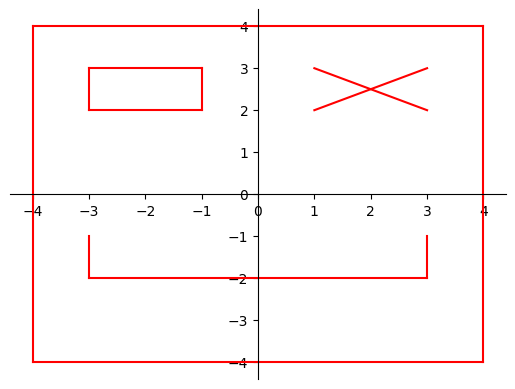

In [125]:
#To get a 4 quadrant graph:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plotPart(Part1, 'r')
plotPart(Part2, 'r')
plotPart(Part3, 'r')
plotPart(Part4, 'r')

plt.show()

I accomplished this by simple using my function for each of the parts 1-4 and then showing the figure.


Below is the graph and the graph of the diagram before the transformation:

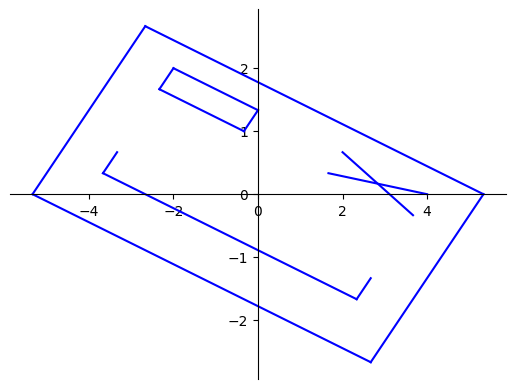

In [126]:
#To get a 4 quadrant graph:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plotPart(newPart1, 'b')
plotPart(newPart2, 'b')
plotPart(newPart3, 'b')
plotPart(newPart4, 'b')

plt.show()

I once again used my same function but for the new parts 1-4 which I calculated prior.<br>
I can concule that this matrix applies a positive shrink scaling on the coordinate vectors (as the image is not mirrored, but it is smaller) and it also applies a rotation on the coordinate vectors of ~45 degrees, as the square smiley pirate is askew.

Exercise 2:<br>
Part (a):<br>
This function will take in step size as an input and output an array of every approximated value in the interval.<br>
I need to use decimal numbers to get rid of floating point storage inaccuracies with stepSize, x and y, which would otherwise lead to slight changes in the value of x and y and skipping of the last iteration as a result.<br>
I append the float versions of x and y for easier use when plotting the graph.<br>
I outputted them in their array form for easy viewing. I chose to return it in an array form as it is easy to see and easy to plot graphs with.

In [127]:
from decimal import Decimal

#Function to calculate results of eulers method, returns array of each x and y
def eulersMethod(stepSize):
    x = Decimal('0')
    y = Decimal('-3')
    outputArray = []
    while x <= 5:
        outputArray.append([float(x),float(y)])
        y = y + stepSize*(x + y/5)
        x += stepSize
    return outputArray

#Printing the results for viewing
print(eulersMethod(Decimal('1')))
print(eulersMethod(Decimal('0.2')))
print(eulersMethod(Decimal('0.05')))

[[0.0, -3.0], [1.0, -3.6], [2.0, -3.32], [3.0, -1.984], [4.0, 0.6192], [5.0, 4.74304]]
[[0.0, -3.0], [0.2, -3.12], [0.4, -3.2048], [0.6, -3.252992], [0.8, -3.26311168], [1.0, -3.2336361472], [1.2, -3.162981593088], [1.4, -3.04950085681152], [1.6, -2.891480891083981], [1.8, -2.68714012672734], [2.0, -2.4346257317964337], [2.2, -2.132010761068291], [2.4, -1.7772911915110226], [2.6, -1.3683828391714634], [2.8, -0.9031181527383221], [3.0, -0.37924287884785496], [3.2, 0.20558740599823086], [3.4, 0.8538109022381601], [3.6, 1.5679633383276865], [3.8, 2.350681871860794], [4.0, 3.2047091467352256], [4.2, 4.132897512604635], [4.4, 5.13821341310882], [4.6, 6.2237419496331725], [4.8, 7.3926916276184995], [5.0, 8.64839929272324]]
[[0.0, -3.0], [0.05, -3.03], [0.1, -3.0578], [0.15, -3.083378], [0.2, -3.10671178], [0.25, -3.1277788978], [0.3, -3.146556686778], [0.35, -3.16302225364578], [0.4, -3.1771524761822376], [0.45, -3.18892400094406], [0.5, -3.198313240953501], [0.55, -3.2052963733630357], [0.6

As dy/dx = x + y/5 can be put in the form dy/dx + P(x)y = Q(x) we can use the seperation of variables technique to find the analytical result:<br>
First, I will put it in the form dy/dx + P(x)y = Q(x):<br>
dy/dx - y/5 = x<br>
so P(x) = -1/5<br>
Q(x) = x <br>
<br>So <br>
IF = e^∫(-1/5)dx = e^(-x/5)
<br>
<br>
As y = (1/IF)×(∫(Q(x)×IF))<br>
y = (1/e^(-x/5))×(∫(xe^(-x/5))) = (1/e^(-x/5))×(-5xe^(-x/5)-25e^(-x/5) + C)<br>
given that when y = -3, x = 0<br>
-3 = 1×(0-25 + C)<br>
C = 22<br>
Therefore, plugging C = 22 in to the above formula for y gives:<br>
y = -5x -25 + 22/(e^-(x/5)) = -5x - 25 + 22e^(x/5)<br>
<br>
<br>
Given this formula result, I can now plot this graph and also plot the results from the euler method as graphs as well:<br>
I need to import math for the eulers number.<br>
<br>
I plotted the eulers method results by going through the array outputted by my eulers method function and adding each x and y value to a new array and used the matplotlib plot function. I did this for each step 1, 0.2 and 0.05.

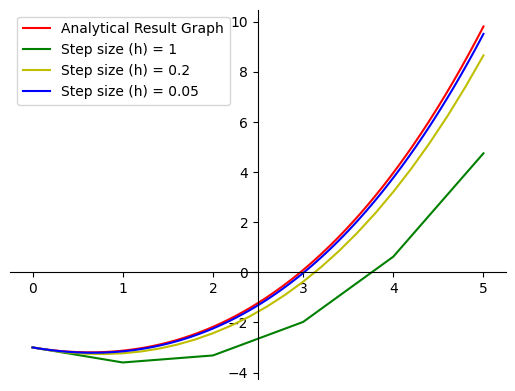

In [132]:
import math

#Plotting the y = -5x - 25 + 22e^(x/5) graph, part 1
x = np.linspace(0,5,1000)
y = -5*x - 25 + 22*math.e**(x/5)

#To get a 4 quadrant graph:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#Plotting the y = -5x - 25 + 22e^(x/5) graph part 2
plt.plot(x, y, 'r')

#Plotting the Euler Method graphs function:
stepOne = eulersMethod(Decimal('1'))
stepTwo = eulersMethod(Decimal('0.2'))
stepFive = eulersMethod(Decimal('0.05'))

def plotGraphFromArray(givenArray, colour):
    xList = []
    yList = []
    m = 0
    for m in givenArray:
        xList.append(m[0])
        yList.append(m[1])
    plt.plot(xList, yList, colour)

#Running the function for each set of Euler Results
plotGraphFromArray(stepOne, 'g')
plotGraphFromArray(stepTwo, 'y')
plotGraphFromArray(stepFive, 'b')

#Plotting a legend + the graph:
plt.gca().legend(('Analytical Result Graph','Step size (h) = 1','Step size (h) = 0.2','Step size (h) = 0.05'))
plt.show()

I can see from these results that the smaller the step size (h), the closer to the actual analytical results graph you get. I can see that the numerical results will converge to the analytical results graph with a smaller h.